In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Create request/session object
s = requests.Session()

# Request website
r = s.get('http://www.oreilly.com/programming/free/')

# Parse website data into BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')

# Create title filters
java_filter = ['Microservices for Java Developers: A Hands-On Introduction to Frameworks and Containers', \
               'Modern Java EE Design Patterns', 'Object-Oriented vs. Functional Programming', 'Java: The Legend']

python_filter = ['A Whirlwind Tour of Python', "20 Python Libraries You Aren't Using (But Should)", 'Hadoop with Python', \
                'How to Make Mistakes in Python', 'Functional Programming in Python', 'Python in Education', \
                'Picking a Python Version: A Manifesto']

open_filter = ['Open Source in Brazil: Growing Despite Barriers', 'Ten Steps to Linux Survival', 'Open by Design', \
               'Getting Started with InnerSource']

soft_filter=['Designing Autonomous Teams and Services', 'Migrating Java to the Cloud', 'What Is Serverless?', \
            'Microservices in Production: Standard Principles and Requirements', 'Microservices AntiPatterns and Pitfalls',\
            'Evolving Architectures of FinTech: Structuring a New Generation of Financial Services with Modular Software and Agile Development Strategies',\
            'Software Architecture Patterns', 'Migrating to Cloud-Native Application Architectures']

# Function to check title against filter lists
def check_category(title):
    if title in java_filter:
        return 'Java'
    elif title in python_filter:
        return 'Python'
    elif title in open_filter:
        return 'Open Source'
    elif title in soft_filter:
        return 'Software Architecture'
    else:
        return 'Other'

In [2]:
# BeautifulSoup to find all div tags with class product-row cover-showcase
website_data = soup.find_all('div', class_ = 'product-row cover-showcase')

In [3]:
# Initialize empty list
info = []

# Iterate each section of product-row cover-showcase and extract book information
for data in range(0, len(website_data)):
    book_info = website_data[data].find_all('a')
    for content in range(0, len(book_info)):
        book = {            
            'Description': book_info[content]['data-content'],
            'Title': book_info[content]['title'],
            'Category': check_category(book_info[content]['title'])
        }
        info.append(book)

In [4]:
# Convert list to dataframe and write to csv
df = pd.DataFrame(info)
df.to_csv('./oreilly-free-books.csv')

# Display number of each category
df.Category.value_counts()

Other                    13
Software Architecture     8
Python                    7
Open Source               4
Java                      4
Name: Category, dtype: int64

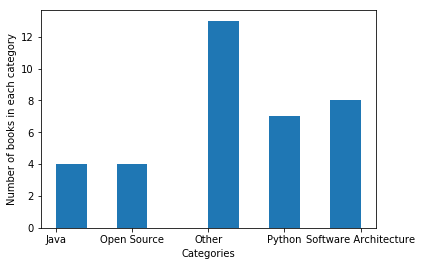

In [7]:
# Plot simple histogram using count of books
plt.hist(df.Category)
plt.xlabel('Categories')
plt.ylabel('Number of books in each category')
plt.show()